<a href="https://colab.research.google.com/github/apexro45/WEEK-4/blob/main/WEEK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [54]:
life_expectancy = pd.read_csv('life_expectancy.csv')
fertility_rate = pd.read_csv('fertility_rate.csv')
population = pd.read_csv('country_population.csv')
country = pd.read_csv('Metadata_Country.csv')

In [5]:
life_expectancy.head()


Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  ...   
1  SP.DYN.LE00.IN  32.292  32.742  33.185  33.624  34.060  34.495  ...   
2  SP.DYN.LE00.IN  33.251  33.573  33.914  34.272  34.645  35.031  ...   
3  SP.DYN.LE00.IN  62.279  63.298  64.187  64.911  65.461  65.848  ...   
4  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  74.576  74.725  74.872  75.016  75.158  75.299  75.440  75.582  75.725   
1  59.694  60.243  60.754  61.226  61.666  62.086  62.494  62.895  63.288   
2  55.096  56.189  57.231  58.192  59.042  59.770  60.373  60.858  61.241   
3  75.656  75.943  76.281  76.652  77.031  77.389  77.702  77.963  78.174   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     2016  
0  75.867  
1  63.673  
2  61.547  
3  78.345  
4     NaN  

[5 rows x 61 columns]

In [33]:
fertility_rate.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code      1960      1961      1962      1963      1964      1965  \
0  SP.DYN.TFRT.IN  4.820000  4.655000  4.471000  4.271000  4.059000  3.842000   
1  SP.DYN.TFRT.IN  7.450000  7.450000  7.450000  7.450000  7.450000  7.450000   
2  SP.DYN.TFRT.IN  7.478000  7.524000  7.563000  7.592000  7.611000  7.619000   
3  SP.DYN.TFRT.IN  6.489000  6.401000  6.282000  6.133000  5.960000  5.773000   
4  SP.DYN.TFRT.IN  5.508217  5.493573  5.495798  5.495507  5.458346  5.415664   

   ...   2007   2008   2009   2010      2011      2012     2013      2014  \
0  ...  1.763  1.764  1.769  1.776  1.783000  1.791000  1.79600  1.800000   
1  ...  6.460  6.254  6.038  5.816  5.595000  5.380000  5.17400  4.981000   
2  ...  6.368  6.307  6.238  6.162  6.082000  6.000000  5.92000  5.841000   
3  ...  1.668  1.650  1.646  1.653  1.668000  1.685000  1.70000  1.710000   
4  ...  1.180  1.250  1.190  1.270  2.877849  2.843581  2.81519  2.791648   

       2015      2016  
0  1.801000  1.800000  
1  4.802000  4.635000  
2  5.766000  5.694000  
3  1.714000  1.713000  
4  2.757183  2.728593  

[5 rows x 61 columns]

In [34]:
population.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  20997687.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2970017.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     82683.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  
2  26920466.0  27859305.0  28813463.0  
3   2889104.0   2880703.0   2876101.0  
4     79223.0     78014.0     77281.0  

[5 rows x 61 columns]

In [38]:
population.drop(['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


In [37]:
fertility_rate.drop(['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)

In [36]:
life_expectancy.drop(['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)

In [46]:
years = [str(i) for i in range(1960, 2016)]
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [151]:
country = country[["Country Code", "Region"]]

In [152]:
country.head()

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [153]:
df = pd.melt(population,
             id_vars='Country Code',
             value_vars= years,
             var_name='year',
             value_name="population")

In [154]:
df.head()

Country Code  year  population
0          ABW  1960     54211.0
1          AFG  1960   8996351.0
2          AGO  1960   5643182.0
3          ALB  1960   1608800.0
4          AND  1960     13411.0

In [155]:
country.head()

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [158]:
country_and_population_merge = pd.merge(country,df,how='left', on='Country Code')

In [159]:
country_and_population_merge.shape

(14728, 4)

In [160]:
country_and_population_merge.head()

Country Code                     Region  year  population
0          ABW  Latin America & Caribbean  1960     54211.0
1          ABW  Latin America & Caribbean  1961     55438.0
2          ABW  Latin America & Caribbean  1962     56225.0
3          ABW  Latin America & Caribbean  1963     56695.0
4          ABW  Latin America & Caribbean  1964     57032.0

In [161]:
df1 = pd.melt(life_expectancy,
             id_vars='Country Code',
             value_vars= years,
             var_name='year',
             value_name="life_expectancy")


In [162]:
df1.head()

Country Code  year  life_expectancy
0          ABW  1960           65.662
1          AFG  1960           32.292
2          AGO  1960           33.251
3          ALB  1960           62.279
4          AND  1960              NaN

In [163]:
country_and_life_expectancy_merge = pd.merge(country,df1,how='left', on='Country Code')

In [164]:
country_and_life_expectancy_merge.shape

(14728, 4)

In [165]:
country_and_life_expectancy_merge.head()

Country Code                     Region  year  life_expectancy
0          ABW  Latin America & Caribbean  1960           65.662
1          ABW  Latin America & Caribbean  1961           66.074
2          ABW  Latin America & Caribbean  1962           66.444
3          ABW  Latin America & Caribbean  1963           66.787
4          ABW  Latin America & Caribbean  1964           67.113

In [166]:
df2 = pd.melt(fertility_rate,
             id_vars='Country Code',
             value_vars= years,
             var_name='year',
             value_name="Fertility rate")


In [167]:
country_and_fertility_rate_merge = pd.merge(country,df2,how='left', on='Country Code')

In [168]:
country_and_fertility_rate_merge.shape

(14728, 4)

In [169]:
country_and_fertility_rate_merge.head()

Country Code                     Region  year  Fertility rate
0          ABW  Latin America & Caribbean  1960           4.820
1          ABW  Latin America & Caribbean  1961           4.655
2          ABW  Latin America & Caribbean  1962           4.471
3          ABW  Latin America & Caribbean  1963           4.271
4          ABW  Latin America & Caribbean  1964           4.059

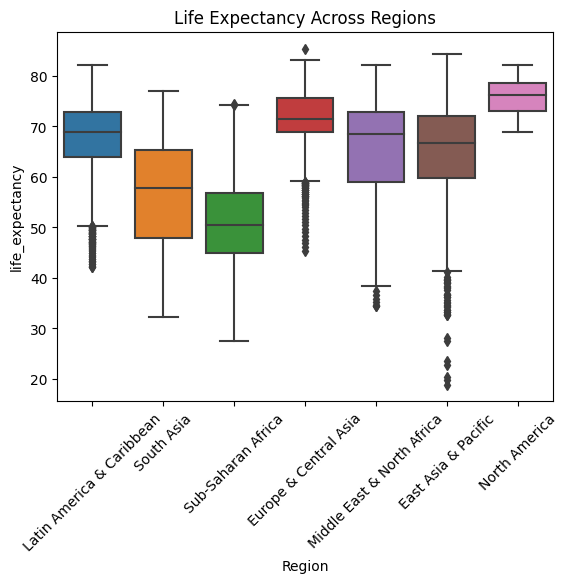

In [173]:
sns.boxplot(x='Region', y='life_expectancy', data=country_and_life_expectancy_merge)
plt.title('Life Expectancy Across Regions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


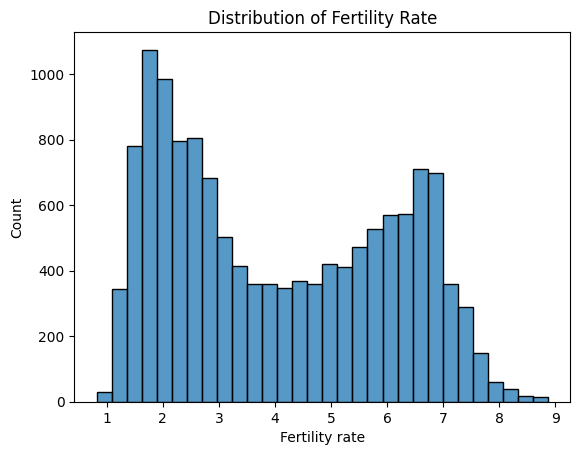

In [174]:
sns.histplot(x='Fertility rate', data=country_and_fertility_rate_merge, bins=30)
plt.title('Distribution of Fertility Rate')
plt.show()


<ipython-input-175-1a1d205b4e5d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


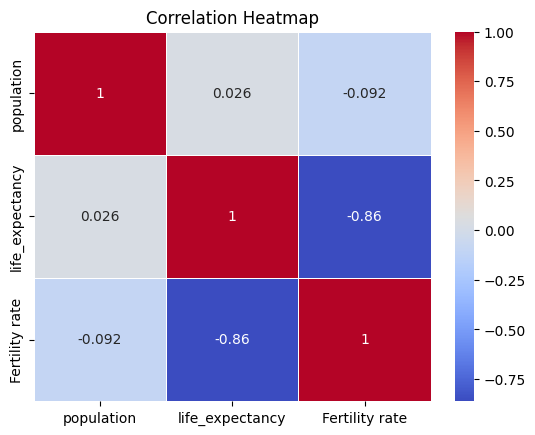

In [175]:
merged_data = pd.merge(country_and_population_merge, df1, on=['Country Code', 'year'])
merged_data = pd.merge(merged_data, df2, on=['Country Code', 'year'])

sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [196]:
# Concatenate the DataFrames along the 'Country Code' and 'year' columns
concatenated_data = pd.concat([country_and_population_merge, country_and_life_expectancy_merge, country_and_fertility_rate_merge], axis=1)

concatenated_data.head()



Country Code                     Region  year  population Country Code  \
0          ABW  Latin America & Caribbean  1960     54211.0          ABW   
1          ABW  Latin America & Caribbean  1961     55438.0          ABW   
2          ABW  Latin America & Caribbean  1962     56225.0          ABW   
3          ABW  Latin America & Caribbean  1963     56695.0          ABW   
4          ABW  Latin America & Caribbean  1964     57032.0          ABW   

                      Region  year  life_expectancy Country Code  \
0  Latin America & Caribbean  1960           65.662          ABW   
1  Latin America & Caribbean  1961           66.074          ABW   
2  Latin America & Caribbean  1962           66.444          ABW   
3  Latin America & Caribbean  1963           66.787          ABW   
4  Latin America & Caribbean  1964           67.113          ABW   

                      Region  year  Fertility rate  
0  Latin America & Caribbean  1960           4.820  
1  Latin America & Caribbean  1961           4.655  
2  Latin America & Caribbean  1962           4.471  
3  Latin America & Caribbean  1963           4.271  
4  Latin America & Caribbean  1964           4.059

In [202]:
final_data = concatenated_data.loc[:, ~concatenated_data.columns.duplicated()]

final_data.head()

Country Code                     Region  year  population  life_expectancy  \
0          ABW  Latin America & Caribbean  1960     54211.0           65.662   
1          ABW  Latin America & Caribbean  1961     55438.0           66.074   
2          ABW  Latin America & Caribbean  1962     56225.0           66.444   
3          ABW  Latin America & Caribbean  1963     56695.0           66.787   
4          ABW  Latin America & Caribbean  1964     57032.0           67.113   

   Fertility rate  
0           4.820  
1           4.655  
2           4.471  
3           4.271  
4           4.059

<ipython-input-305-d7ebdc3e56ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['year'] = final_data['year'].astype(int)
<ipython-input-305-d7ebdc3e56ae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.sort_values(by=['year', 'Country Code'], inplace=True)
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns

<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(


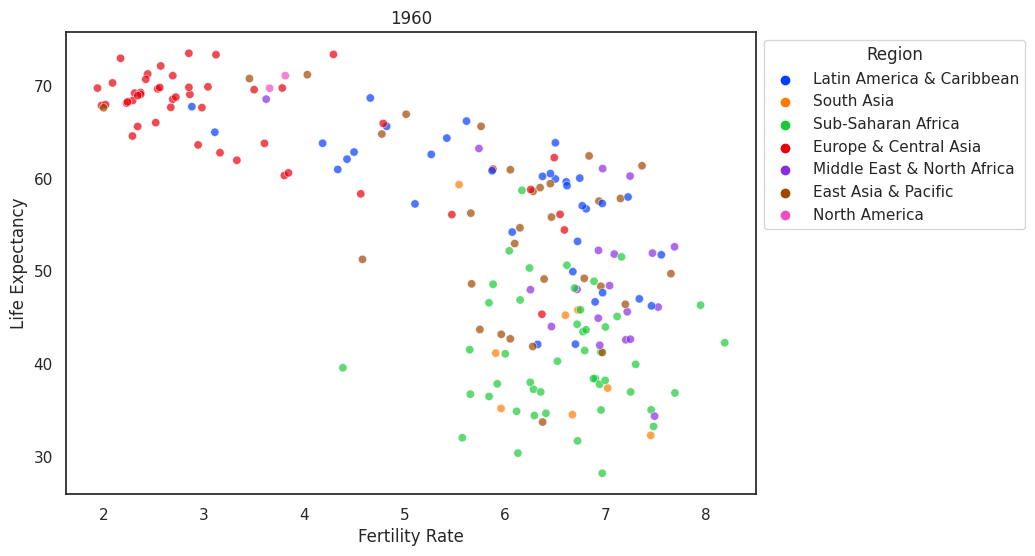

In [305]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
import numpy as np

final_data['year'] = final_data['year'].astype(int)

step_size = 1
selected_years = range(final_data['year'].min(), final_data['year'].max() + 1, step_size)

final_data.sort_values(by=['year', 'Country Code'], inplace=True)

# Increase the figure size and use tight_layout
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="white")

custom_palette = sns.color_palette("bright", n_colors=len(final_data['Region'].unique()))

def update(frame):
    ax.clear()

    sns.scatterplot(
        x='Fertility rate',
        y='life_expectancy',
        hue='Region',
        sizes=(300, 1600),
        data=final_data[final_data['year'] == frame],
        ax=ax,
        palette=custom_palette,
        alpha=0.7,
        legend=True
    )

    ax.set_xlabel('Fertility Rate')
    ax.set_ylabel('Life Expectancy')
    ax.set_title(f"{frame}")

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=selected_years, repeat=False)

# Adjust subplot parameters to make room for the legend
plt.subplots_adjust(right=0.7)

# Display the animation as HTML
HTML(ani.to_jshtml())



In [307]:
ani.save('final.gif', writer='imagemagick', fps=2)

<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(
<ipython-input-305-d7ebdc3e56ae>:23: UserWarning: The palette list has more values (8) than needed (